**Task**:

To predict traffic patterns in each of these four junctions for the next 4 months.

The sensors on each of these junctions were collecting data at different times, hence you will see traffic data from different time periods. To add to the complexity, some of the junctions have provided limited or sparse data requiring thoughtfulness when creating future projections. Depending upon the historical data of 20 months, the government is looking to you to deliver accurate traffic projections for the coming four months. Your algorithm will become the foundation of a larger transformation to make your city smart and intelligent.

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [202]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

In [170]:
print(f"Shape of train is {train.shape} and test is {test.shape}")

Shape of train is (48120, 4) and test is (11808, 3)


In [171]:
train.head(5)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [172]:
train.tail(5)

,DateTime,Junction,Vehicles,ID
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224
48119,2017-06-30 23:00:00,4,12,20170630234


In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [174]:
train.isna().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [175]:
train['Junction'].nunique()

4

In [176]:
train['Junction'] = train['Junction'].astype('category')

In [177]:
train['Junction'].value_counts()

1    14592
2    14592
3    14592
4     4344
Name: Junction, dtype: int64

<AxesSubplot:xlabel='Junction', ylabel='count'>

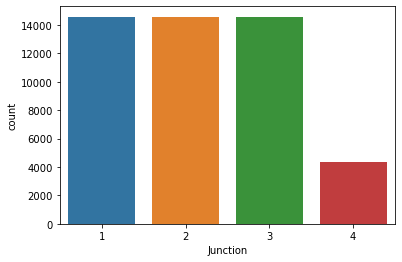

In [178]:
sns.countplot(x= 'Junction', data = train)

In [179]:
train[train['DateTime']=='2015-11-01 00:00:00']

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
14592,2015-11-01 00:00:00,2,6,20151101002
29184,2015-11-01 00:00:00,3,9,20151101003


In [180]:
train['DateTime'] =  pd.to_datetime(train['DateTime'], infer_datetime_format=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  category      
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 1.1 MB


In [181]:
train.head(2)

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011


In [182]:
grouped_junction = train.groupby('Junction').count()

In [183]:
grouped_junction

,DateTime,Vehicles,ID
Junction,,,
1,14592,14592,14592
2,14592,14592,14592
3,14592,14592,14592
4,4344,4344,4344


In [184]:
train.groupby('Junction')['DateTime'].agg(['min', 'max'])

,min,max
Junction,,
1,2015-11-01,2017-06-30 23:00:00
2,2015-11-01,2017-06-30 23:00:00
3,2015-11-01,2017-06-30 23:00:00
4,2017-01-01,2017-06-30 23:00:00


In [185]:
train1 = train.copy()

In [186]:
import datetime as dt
#train1['Year'] = train1.DateTime.dt.year
#train1['Month'] = train.DateTime.dt.month
train1['Day'] = train1.DateTime.dt.day
train1['Hour'] = train1.DateTime.dt.hour
train1['Weekday'] = train1.DateTime.dt.day_of_week

In [187]:
weekend = [5,6]
train1['is_weekend'] = train1['Weekday'].apply(lambda x : 1 if x in weekend else 0)
#train1['is_weekend']

In [188]:
train1.head(3)

,DateTime,Junction,Vehicles,ID,Day,Hour,Weekday,is_weekend
0,2015-11-01 00:00:00,1,15,20151101001,1,0,6,1
1,2015-11-01 01:00:00,1,13,20151101011,1,1,6,1
2,2015-11-01 02:00:00,1,10,20151101021,1,2,6,1


In [189]:
from sklearn.preprocessing import OneHotEncoder

In [190]:
#train1 = pd.get_dummies(columns = ['Junction','Year','Month','is_weekend'], data = train1)
train1 = pd.get_dummies(columns = ['Junction','Weekday','is_weekend'], data = train1)

In [191]:
train1.head(3)

,DateTime,Vehicles,ID,Day,Hour,Junction_1,Junction_2,Junction_3,Junction_4,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,is_weekend_0,is_weekend_1
0,2015-11-01 00:00:00,15,20151101001,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,2015-11-01 01:00:00,13,20151101011,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1
2,2015-11-01 02:00:00,10,20151101021,1,2,1,0,0,0,0,0,0,0,0,0,1,0,1


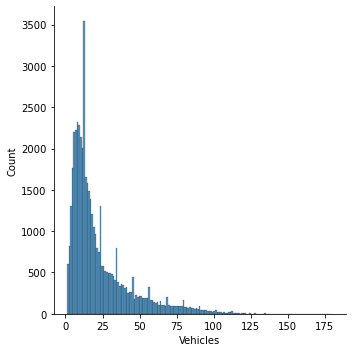

In [192]:
sns.displot(data=train1, x="Vehicles")

In [193]:
train1.Vehicles.describe()

count    48120.000000
mean        22.791334
std         20.750063
min          1.000000
25%          9.000000
50%         15.000000
75%         29.000000
max        180.000000
Name: Vehicles, dtype: float64

In [194]:
from sklearn.utils import shuffle
X = train1.drop(columns = ['Vehicles', 'ID','DateTime'])
y = train1['Vehicles']
X,y = shuffle(X,y)

In [195]:
#!pip install --user lightgbm

In [196]:
#from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle =True)
model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -7.022 (0.113)


In [197]:
test['DateTime'] =  pd.to_datetime(test['DateTime'], infer_datetime_format=True)
#test['Year'] = test.DateTime.dt.year
#test['Month'] = test.DateTime.dt.month
test['Day'] = test.DateTime.dt.day
test['Hour'] = test.DateTime.dt.hour
test['Weekday'] = test.DateTime.dt.day_of_week
test['is_weekend'] = test['Weekday'].apply(lambda x : 1 if x in weekend else 0)
test = pd.get_dummies(columns = ['Junction','Weekday','is_weekend'], data = test)
test = test.drop(columns = ['ID','DateTime'])

In [198]:
model.fit(X,y)
y_pred = model.predict(test)
y_pred.shape

(11808,)

In [199]:
import math

In [200]:
submision = pd.DataFrame(y_pred , columns =['Vehicles'])
submision['Vehicles'] = submision['Vehicles'].apply(np.ceil).astype('int')

In [203]:
submision['ID'] = test['ID']

In [204]:
submision = submision[['ID','Vehicles']]
submision.head(3)

,ID,Vehicles
0,20170701001,47
1,20170701011,41
2,20170701021,33


In [205]:
submision.to_csv(r'submission.csv', index=False)

In [206]:
test.shape

(11808, 3)

In [207]:
X_test.shape

(9624, 24)

In [208]:
test.head()

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [209]:
X.head()

,Day,Hour,Junction_1,Junction_2,Junction_3,Junction_4,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,is_weekend_0,is_weekend_1
8630,25,14,1,0,0,0,0,1,0,0,0,0,0,1,0
1568,5,8,1,0,0,0,0,1,0,0,0,0,0,1,0
29815,27,7,0,0,1,0,0,0,0,0,1,0,0,1,0
46046,5,14,0,0,0,1,0,0,1,0,0,0,0,1,0
13928,3,8,1,0,0,0,0,0,0,0,0,1,0,0,1


In [210]:
test.shape

(11808, 3)

In [211]:
X.columns

Index(['Day', 'Hour', 'Junction_1', 'Junction_2', 'Junction_3', 'Junction_4',
       'Weekday_0', 'Weekday_1', 'Weekday_2', 'Weekday_3', 'Weekday_4',
       'Weekday_5', 'Weekday_6', 'is_weekend_0', 'is_weekend_1'],
      dtype='object')